In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from utilsBaricentricNeuralNetwork import *

In [11]:
# Define the values and its image
a = 1.0
b = 3.0
f_a = 2.0
f_b = 4.0

# Normalizar entrada t = (x - b) / (a - b)
def compute_t(x):
    return (a - x) / (a - b)

def custom_activation_h1(x):
    neuron_1 = tf.nn.relu(x[:, 0])  # Primera neurona usa ReLU
    neuron_2 = tf.cast(x[:, 1] > 0, dtype=tf.float32)  # Segunda neurona usa Step
    neuron_3 = tf.cast(x[:, 2] > 0, dtype=tf.float32)  # Tercera neurona usa Step
    neuron_4 = tf.nn.relu(x[:, 3])  # Cuarta neurona usa ReLU
    return tf.stack([neuron_1, neuron_2, neuron_3, neuron_4], axis=1)
    
# Define the model as option 1
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,),name="Input"),
    tf.keras.layers.Lambda(compute_t,name="Compute_t"),
    tf.keras.layers.Dense(4, activation=None,
                       kernel_initializer=tf.constant_initializer([[1], 
                                                                   [-1], 
                                                                   [1], 
                                                                   [-1]]),
                       bias_initializer=tf.constant_initializer([0, 0, -1, 1]),name="H1"),
    tf.keras.layers.Lambda(custom_activation_h1,name="ActH1"),
    tf.keras.layers.Dense(2, activation="relu",
                       kernel_initializer=tf.constant_initializer([[-1, 0], 
                                                                   [-2, -2], 
                                                                   [-2, -2],
                                                                   [0, -1]]),
                       bias_initializer=tf.constant_initializer([1, 1]),name="H2"),
    tf.keras.layers.Dense(1, activation=None,
                       kernel_initializer=tf.constant_initializer([[f_a, f_b]]),
                       bias_initializer=tf.constant_initializer([0]),name="Output")
])

x_input = np.array([[2],[1.5],[6]])
outputs = model(x_input)
print(outputs)

# Define the model as option 2
# inputs = tf.keras.Input(shape=(1,))
# t = tf.keras.layers.Lambda(compute_t)(inputs)
# # Primera capa oculta
# h1 = tf.keras.layers.Dense(4, activation=None,
#                            kernel_initializer=tf.constant_initializer([[1], 
#                                                                        [-1], 
#                                                                        [1], 
#                                                                        [-1]]),
#                            bias_initializer=tf.constant_initializer([0, 0, -1, 1]))(t)
# h1_activated = tf.keras.layers.Lambda(custom_activation_h1)(h1)
# # Segunda capa oculta
# h2 = tf.keras.layers.Dense(4, activation=None,
#                            kernel_initializer=tf.constant_initializer([[-1, 0, 0, 0], 
#                                                                        [0, 1, 0, 0], 
#                                                                        [0, 0, 1, 0], 
#                                                                        [0, 0, 0, -1]]),
#                            bias_initializer=tf.constant_initializer([1, 0, 0, 1]))(h1_activated)
# h2_activated = tf.keras.layers.Lambda(custom_activation_h2)(h2)
# # Tercera capa oculta
# h3 = tf.keras.layers.Dense(2, activation=None,
#                            kernel_initializer=tf.constant_initializer([[1, 0], 
#                                                                        [-1, 0], 
#                                                                        [0, -1],
#                                                                        [0, 1]]),
#                            bias_initializer=tf.constant_initializer([0, 0]))(h2_activated)
# # Capa de salida
# outputs = tf.keras.layers.Dense(1, activation=None,
#                                 kernel_initializer=tf.constant_initializer([[f_a, f_b]]),
#                                 bias_initializer=tf.constant_initializer([0]))(h3)


# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Corroborating layer by layer (only if created by option 2
# activation_model = tf.keras.Model(inputs=inputs, outputs=[t, h1, h1_activated, h2, h2_activated, h3, outputs])
# x_input = np.array([[2],[1.5],[6]])
# activations_output = activation_model.predict(x_input)
# for i, activation in enumerate(activations_output):
#     print(f"Salida de la capa {i}: {activation}")

tf.Tensor(
[[3. ]
 [2.5]
 [0. ]], shape=(3, 1), dtype=float32)


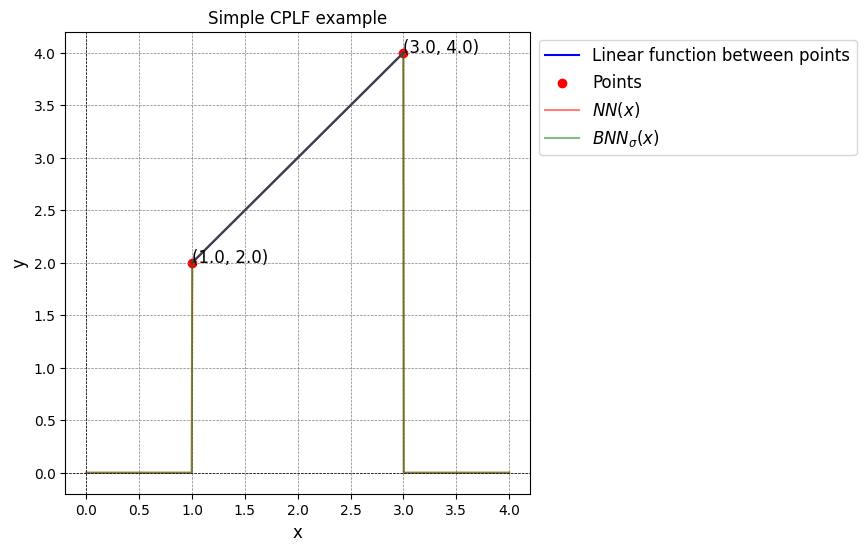

In [12]:
points = tf.constant([[1,2],[3,4]],dtype = tf.float32)
networkBNN = BaricentricSigmaNetworkTf(points)
x_valuesBNN = tf.linspace(0, 4, 1000)  
outputsBNN = networkBNN(x_valuesBNN)
outputsBNNNN = model(x_valuesBNN)
plt.figure(figsize=(6, 6))
plt.plot([a, b], [f_a, f_b], 'b-', label="Linear function between points")  
plt.scatter([a, b], [f_a, f_b], color='red', label="Points")    

plt.text(a, f_a, f"({a}, {f_a})", fontsize=12)
plt.text(b, f_b, f"({b}, {f_b})", fontsize=12)

plt.plot(x_valuesBNN, outputsBNNNN, 'r-', label='$NN(x)$', alpha=0.5)

plt.plot(x_valuesBNN, outputsBNN, 'g-', label='$BNN_{\sigma}(x)$', alpha=0.5)

plt.title("Simple CPLF example", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color='black',linewidth=0.5, linestyle="--")  
plt.axvline(0, color='black',linewidth=0.5, linestyle="--")  
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor=(1,1),fontsize=12)
plt.show()